In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}


In [ ]:
results = {}
recall_scores = {}
false_negatives = {}


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)

    if name in ["Logistic Regression", "SVM"]:
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob >= 0.3).astype(int)
    else:
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    recall_scores[name] = recall
    false_negatives[name] = fn

    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"False Negatives: {fn}")

    print("Confusion Matrix (Actual vs Predicted):")
    print("                 Predicted Benign   Predicted Malignant")
    print(f"Actual Benign            {tn:<5}              {fp}")
    print(f"Actual Malignant         {fn:<5}              {tp}")
    print("-------------------------------")



Logistic Regression
Accuracy: 0.9766
Recall: 0.9907
False Negatives: 1
Confusion Matrix (Actual vs Predicted):
                 Predicted Benign   Predicted Malignant
Actual Benign            60                 3
Actual Malignant         1                  107
-------------------------------

SVM
Accuracy: 0.9825
Recall: 0.9907
False Negatives: 1
Confusion Matrix (Actual vs Predicted):
                 Predicted Benign   Predicted Malignant
Actual Benign            61                 2
Actual Malignant         1                  107
-------------------------------

Random Forest
Accuracy: 0.9708
Recall: 0.9907
False Negatives: 1
Confusion Matrix (Actual vs Predicted):
                 Predicted Benign   Predicted Malignant
Actual Benign            59                 4
Actual Malignant         1                  107
-------------------------------

KNN
Accuracy: 0.9591
Recall: 0.9722
False Negatives: 3
Confusion Matrix (Actual vs Predicted):
                 Predicted Benign   Predicte

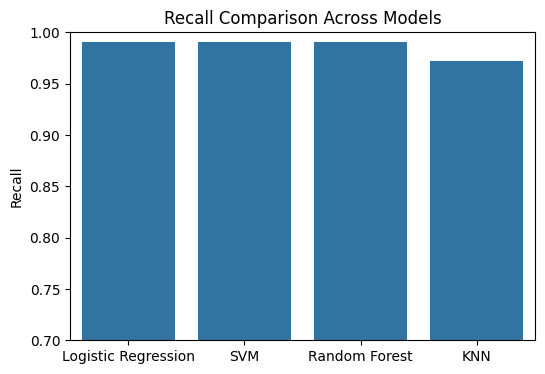

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(recall_scores.keys()), y=list(recall_scores.values()))
plt.ylim(0.7, 1)
plt.ylabel("Recall")
plt.title("Recall Comparison Across Models")
plt.show()

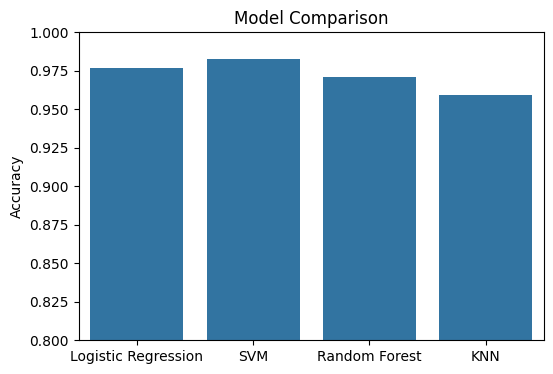

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0.8, 1)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [ ]:
best_model = min(false_negatives, key=false_negatives.get)
print("Model with lowest false negatives:", best_model)
print("False Negatives:", false_negatives[best_model])
print("Recall:", recall_scores[best_model])


Model with lowest false negatives: Logistic Regression
False Negatives: 1
Recall: 0.9907407407407407


In [ ]:
train_accuracies = {}
test_accuracies = {}

for name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_accuracies[name] = train_acc
    test_accuracies[name] = test_acc

    print(name)
    print("Training Accuracy:", round(train_acc, 4))
    print("Testing Accuracy:", round(test_acc, 4))
    print("---------------------------")


Logistic Regression
Training Accuracy: 0.9874
Testing Accuracy: 0.9825
---------------------------
SVM
Training Accuracy: 0.9874
Testing Accuracy: 0.9708
---------------------------
Random Forest
Training Accuracy: 1.0
Testing Accuracy: 0.9708
---------------------------
KNN
Training Accuracy: 0.9774
Testing Accuracy: 0.9591
---------------------------


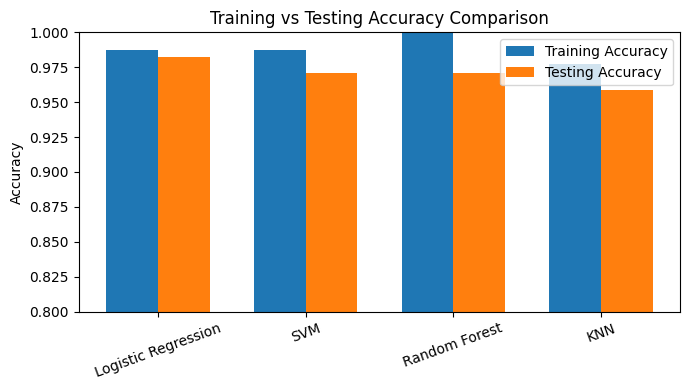

In [ ]:
labels = list(train_accuracies.keys())
train_vals = list(train_accuracies.values())
test_vals = list(test_accuracies.values())

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - width/2, train_vals, width, label="Training Accuracy")
plt.bar(x + width/2, test_vals, width, label="Testing Accuracy")

plt.xticks(x, labels, rotation=20)
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy Comparison")
plt.ylim(0.8, 1)
plt.legend()
plt.tight_layout()
plt.show()
